<a href="https://colab.research.google.com/github/ssarker21/Introduction-to-Machine-Learning/blob/main/HW3_Problem2(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 score: 0.9701492537313433


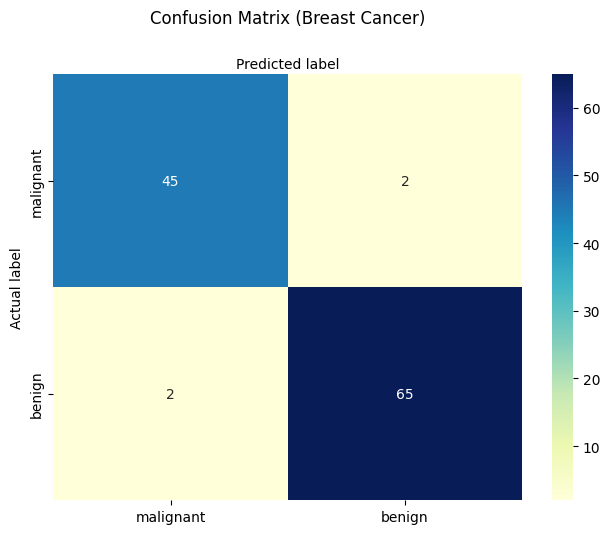

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1) Load the dataset exactly as requested
from sklearn import datasets
data = datasets.load_breast_cancer()
X = data.data                  # all 30 features
y = data.target                # target: 0 = malignant, 1 = benign

# 2) Train / test split (80/20) in your style
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.20, random_state=0
)

# 3) Feature scaling (fit on train, transform train+test)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)

# 4) Logistic Regression (same model family; higher max_iter to ensure convergence)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X_train, Y_train)

# 5) Predictions
Y_pred = classifier.predict(X_test)

# 6) Metrics: accuracy, precision, recall, F1
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix

print("Accuracy:",  metrics.accuracy_score(Y_test, Y_pred))
# Note: In this dataset, 1 = 'benign' is the positive class by default
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:",    metrics.recall_score(Y_test, Y_pred))
print("F1 score:",  f1_score(Y_test, Y_pred))

# 7) Confusion Matrix (heatmap)
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[0, 1])

# Use human-readable class names in the correct order
class_names = list(data.target_names)  # ['malignant', 'benign']

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix),
            annot=True, cmap="YlGnBu", fmt='g',
            xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix (Breast Cancer)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()